#imports

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [88]:
data=pd.read_csv('/content/churn-bigml-80.csv')


In [89]:
data_test = pd.read_csv('/content/churn-bigml-20.csv')

In [90]:
data_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


# prepro

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [92]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [93]:
data["International plan"] = data["International plan"].replace({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].replace({"Yes": 1, "No": 0})


/tmp/ipython-input-1047976651.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["International plan"] = data["International plan"].replace({"Yes": 1, "No": 0})
/tmp/ipython-input-1047976651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Voice mail plan"] = data["Voice mail plan"].replace({"Yes": 1, "No": 0})


In [94]:
data["Churn"] = data["Churn"].astype(int)

In [95]:
data['State']

,State
0,KS
1,OH
2,NJ
3,OH
4,OK
...,...
2661,SC
2662,AZ
2663,WV
2664,RI


In [96]:
data.drop('Area code',inplace=True,axis=1)

In [97]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)  # Remove inplace=True


In [98]:
data

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [99]:
data["Churn"].value_counts()

,count
Churn,
0,2278
1,388


In [100]:
data

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [101]:
data

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [102]:
data.value_counts()

State  Account length  International plan  Voice mail plan  Number vmail messages  Total day minutes  Total day calls  Total day charge  Total eve minutes  Total eve calls  Total eve charge  Total night minutes  Total night calls  Total night charge  Total intl minutes  Total intl calls  Total intl charge  Customer service calls  Churn
WY     225             0                   0                0                      182.7              142              31.06             246.5              63               20.95             218.0                103                9.81                8.8                 2                 2.38               1                       0        1
AK     41              0                   0                0                      159.3              66               27.08             125.9              75               10.70             261.9                76                 11.79               11.1                5                 3.00               1                       0        1
       48              0                   1                37                     211.7              115              35.99             159.9              84               13.59             144.1                80                 6.48                12.2                1                 3.29               1                       0        1
       50              0                   0                0                      183.6              107              31.21             58.6               118              4.98              202.6                99                 9.12                8.7                 3                 2.35               1                       0        1
       51              1                   1                12                     135.8              60               23.09             200.6              134              17.05             192.4                98                 8.66                12.3                7                 3.32               2                       0        1
                                                                                                                                                                                                                                                                                                                                                    ..
       78              0                   0                0                      190.3              88               32.35             194.5              89               16.53             256.5                109                11.54               11.7                5                 3.16               2                       0        1
       76              0                   0                0                      143.7              55               24.43             173.1              108              14.71             239.1                95                 10.76               5.8                 6                 1.57               1                       0        1
       74              0                   0                0                      262.3              114              44.59             198.9              96               16.91             165.9                90                 7.47                6.6                 5                 1.78               3                       0        1
       71              0                   0                0                      185.0              84               31.45             232.5              129              19.76             191.1                82                 8.60                14.9                4                 4.02               3                       0        1
       61              0                   1                15                     252.4              106              42.91             187.8              69               15.96             259.6                137                1

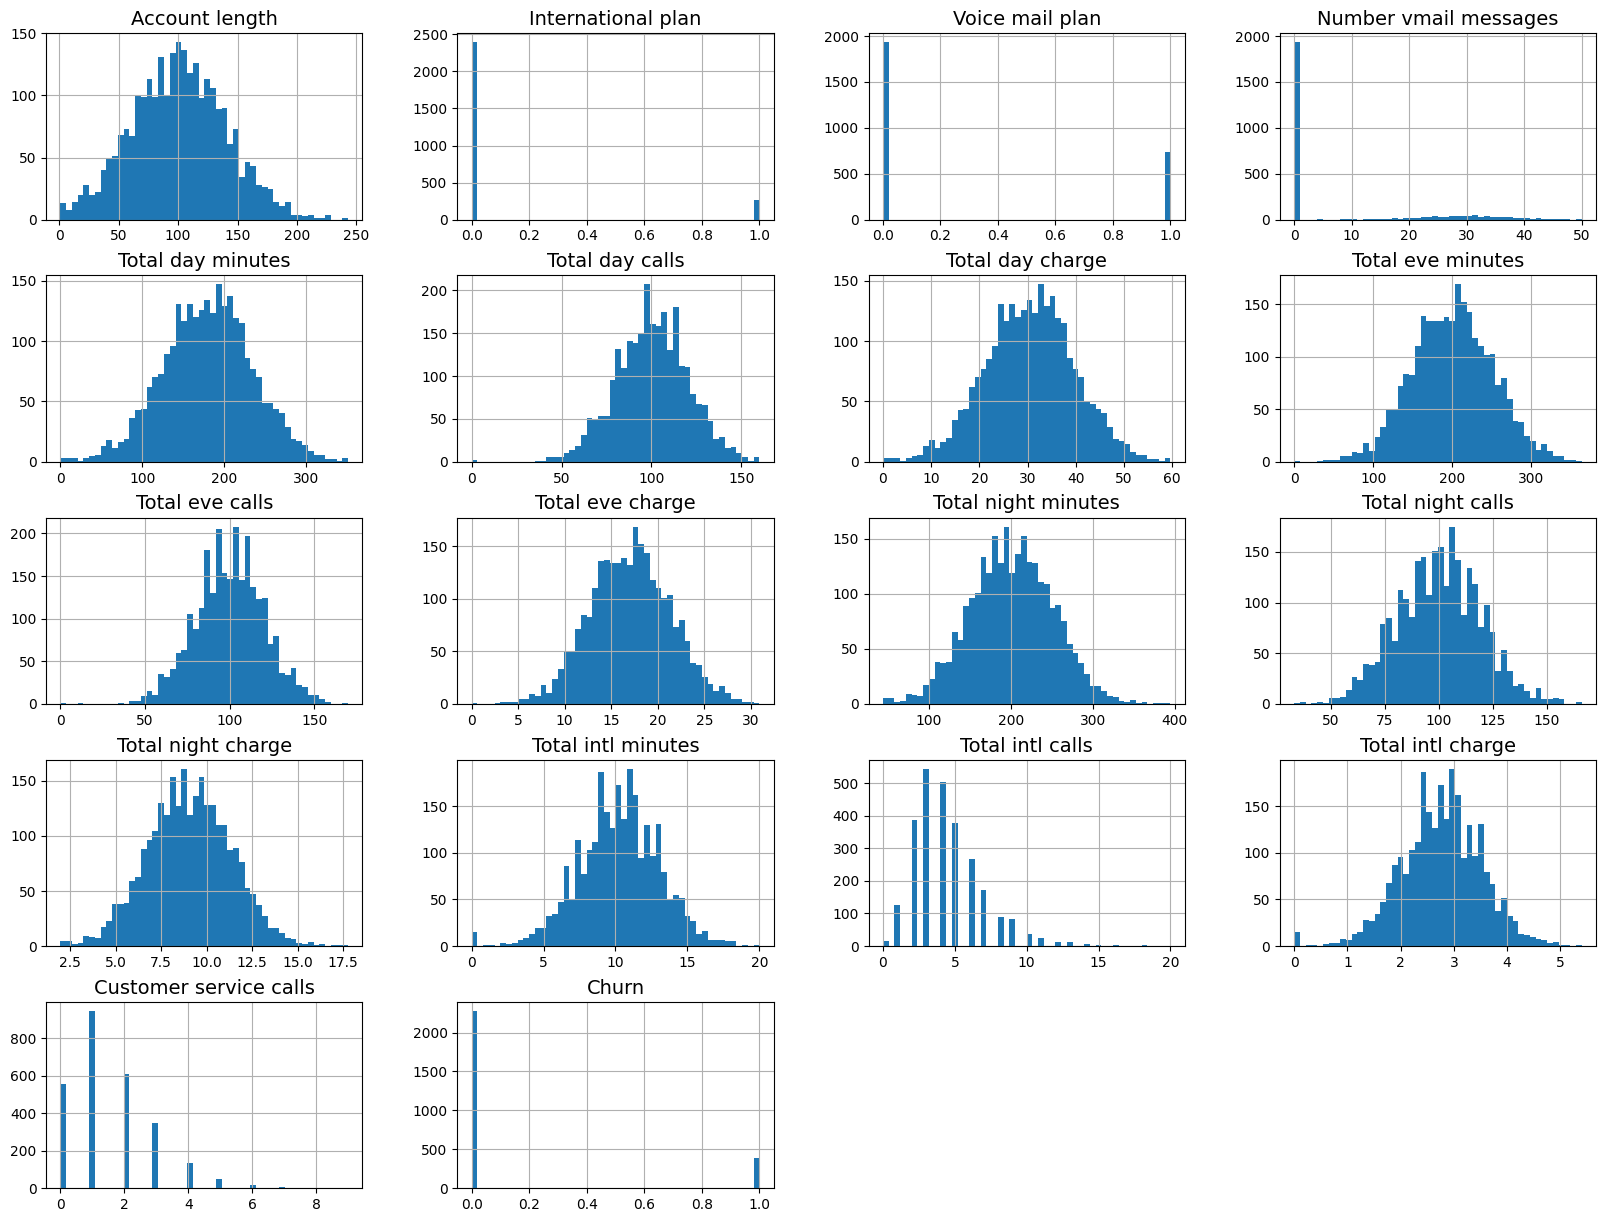

In [103]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(20, 15))

plt.show()

In [ ]:
#Import Libraries
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

#pipeline

In [107]:
cat_col= X_train.select_dtypes('object').columns

In [153]:
#Import Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import StandardScaler

num_col = X_train.select_dtypes(include=np.number).columns
cat_col= X_train.select_dtypes('object').columns
cat_transformer=Pipeline(steps=[
('enc',OneHotEncoder(handle_unknown='ignore'))
                                                   ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_col),
        ('cat', cat_transformer,cat_col)
    ])
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200))
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'total_minutes',
       'total_calls', 'total_charge', 'minutes_per_call'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['State'], dtype='object'))])),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [117]:
pipeline.score(X_train,y_train)

1.0

In [118]:
y_pred=pipeline.predict(X_test)

In [119]:
#Import Libraries
from sklearn.metrics import classification_report
#----------------------------------------------------

#----------------------------------------------------
#Calculating classification Report :
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print( ClassificationReport )

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       754
           1       0.96      0.52      0.68       126

    accuracy                           0.93       880
   macro avg       0.94      0.76      0.82       880
weighted avg       0.93      0.93      0.92       880



In [ ]:
#Import Libraries
from sklearn.metrics import classification_report
#----------------------------------------------------

#----------------------------------------------------
#Calculating classification Report :
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_pred,y_test)
print( ClassificationReport )

In [ ]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------------------------------

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
CM

In [ ]:
#Import Libraries
ltfrom sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as p
#----------------------------------------------------

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
CM

In [ ]:
#Import Libraries
from sklearn.metrics import roc_auc_score
#----------------------------------------------------

#----------------------------------------------------
#Calculating ROC AUC Score:
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

In [147]:
# Create new features
for df in [X_train, X_test]:
    df['total_minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']
    df['total_calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']
    df['total_charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']
    df['minutes_per_call'] = df['total_minutes'] / df['total_calls']
    # handle cases where total_calls is 0
    df['minutes_per_call'] = df['minutes_per_call'].fillna(0)



In [164]:
# Import libraries
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import classification_report

# Define numerical and categorical columns
num_col = X_train.select_dtypes(include=np.number).columns
cat_col = X_train.select_dtypes('object').columns

# Preprocessor for ColumnTransformer
cat_transformer = Pipeline(steps=[
    ('enc', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_col),
        ('cat', cat_transformer, cat_col)
    ])

# Pipeline with SMOTE + XGBoost
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),  # Preprocess data
    ('smote', SMOTE(k_neighbors=5,random_state=42)),  # Apply SMOTE only to training folds
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       754
           1       0.96      0.86      0.90       126

    accuracy                           0.97       880
   macro avg       0.97      0.93      0.94       880
weighted avg       0.97      0.97      0.97       880



In [165]:
# Import libraries
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn's Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import classification_report

# Define numerical and categorical columns
num_col = X_train.select_dtypes(include=np.number).columns
cat_col = X_train.select_dtypes('object').columns

# Preprocessor for ColumnTransformer
cat_transformer = Pipeline(steps=[
    ('enc', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_col),
        ('cat', cat_transformer, cat_col)
    ])

# Pipeline with SMOTE + XGBoost
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),  # Preprocess data
    ('smote', SMOTE(k_neighbors=5,random_state=42)),  # Apply SMOTE only to training folds
    ('classifier', XGBClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       754
           1       0.96      0.85      0.90       126

    accuracy                           0.97       880
   macro avg       0.97      0.92      0.94       880
weighted avg       0.97      0.97      0.97       880

